In [1]:
# Activate the julia environment in the working directory. 
using Pkg 
Pkg.activate(".")    # See Project.toml for packages loaded. 
Pkg.instantiate() 
Pkg.precompile() 

using Plots
 
# Inculde pre-written utility files. 
include("ATUSDownload.jl")

  Activating project at `~/Repos/DoingRightNow-Analysis`


download_atus_data

# Examine the Respondent file

Information on ATUS files can be found [here](https://www.bls.gov/tus/data/datafiles-2021.htm). A PDF of the data dictionary can be found [here](https://www.bls.gov/tus/dictionaries/atusintcodebk21.pdf). A general user guide PDF can be found [here](www.bls.gov/tus/atususersguide.pdf). 
 
We'll start by looking at the Respondent file for
2021. Here's detail on the file from the ATUS website.
 
> About the Basic ATUS Data Files: 
> ATUS Respondent File 
> This file contains case-specific variables collected in ATUS (that is, variables for which there is one value for each respondent). These include, for example, labor force and earnings information, total time providing secondary childcare, and ATUS statistical weights. 
>  
> There is one record for each ATUS respondent. 
>  
> Below is a simplified example. The variable TUCASEID identifies each household, and the variable TULINENO identifies each individual within the household. The example contains responses from five individuals; note that the respondent always has TULINENO = 1. In the example, each respondent has a corresponding statistical weight for use in generating estimates representative of the U.S. civilian, noninstitutionalized population (TUFINLWGT), and values for school enrollment (TESCHENR), labor force status (TELFS), and total number of minutes spent alone on the diary day (TRTALONE). The actual ATUS Respondent file contains more variables and records. 
 
| TUCASEID       | TULINENO | TUFINLWGT   | TESCHENR | TELFS | TRTALONE | 
|----------------|----------|-------------|----------|-------|----------| 
| 20060101020210 | 1        | 22261358.19 | 1        | 1     | 40       | 
| 20060101020211 | 1        | 5019645.31  | 1        | 1     | 350      | 
| 20060101020212 | 1        | 2926068.74  | 1        | 5     | 0        | 
| 20060101020213 | 1        | 25780574.07 | 2        | 5     | 556      | 
| 20060101020214 | 1        | 3414645.94  | 1        | 4     | 100      | 


This is information about our population. So this is a good place to start. 
 
The 
 
There are some coded values we'll need to process. Specifically: 
-1
-2
-3

Weighting can be used for averages in the following manner. 
 
Let $\overline{T_j}$ be average time spend on activity $j$. This can be calculated as follows 
 
$$ 
\overline{T_j} = \frac{ \sum_i fwgt_i T_{ij} }{ \sum_i fwgt_i } 
$$ 
 
where $fwgt_i$ is teh 

Now let's pull the data and start looking at the population. 
 
I've already created a function 

In [2]:
resp2021 = download_atus_data("resp",2021) 
first(resp2021,10)

Row,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,TEERNPER,TEERNRT,TEERNUOT,TEERNWKP,TEHRFTPT,TEHRUSL1,TEHRUSL2,TEHRUSLT,TEIO1COW,TEIO1ICD,TEIO1OCD,TELAYAVL,TELAYLK,TELFS,TELKAVL,TELKM1,TEMJOT,TERET1,TESCHENR,TESCHFT,TESCHLVL,TESPEMPNOT,TESPUHRS,TRCHILDNUM,TRDPFTPT,TRDTIND1,TRDTOCC1,TRERNHLY,TRERNUPD,TRERNWA,TRHERNAL,TRHHCHILD,TRHOLIDAY,TRIMIND1,TRMJIND1,TRMJOCC1,TRMJOCGR,TRNHHCHILD,TRNUMHOU,TROHHCHILD,TRSPFTPT,TRSPPRES,TRTALONE,TRTALONE_WK,TRTCC,TRTCCC,TRTCCC_WK,TRTCCTOT,TRTCHILD,TRTCOC,TRTEC,TRTFAMILY,TRTFRIEND,TRTHH,TRTHHFAMILY,TRTNOCHILD,TRTNOHH,TRTO,TRTOHH,TRTOHHCHILD,TRTONHH,TRTONHHCHILD,TRTSPONLY,TRTSPOUSE,TRTUNMPART,TRWERNAL,TRYHHCHILD,TTHR,TTOT,TTWK,TUABSOT,TUBUS,TUBUS1,TUBUS2OT,TUBUSL1,TUBUSL2,TUBUSL3,TUBUSL4,TUCC2,TUCC4,TUCC5B_CK,TUCC5_CK,TUCC9,TUDIARYDATE,TUDIARYDAY,TUDIS,TUDIS1,TUDIS2,TUECYTD,TUELDER,⋯
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String15,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,20210101210037,1,2021,1,-1,-1,1290,-1,40,1,1,-1,2,-1,-1,40,-1,40,4,4870,4720,-1,-1,1,-1,-1,2,-1,-1,-1,-1,-1,-1,0,1,22,16,1290,0,51600,0,2,0,7,5,4,3,2,1,2,-1,3,450,450,0,0,540,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210128,5,-1,-1,-1,-1,2,⋯
2,20210101210081,1,2021,1,-1,-1,1550,-1,37,1,1,-1,2,-1,-1,34,-1,34,4,5480,4700,-1,-1,1,-1,-1,2,-1,2,-1,-1,1,27,1,2,22,16,1550,0,57350,0,1,0,7,5,4,3,2,3,1,2,2,330,330,600,0,0,600,540,0,-1,540,0,600,540,0,0,600,600,540,0,0,0,0,480,0,10,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-2,19:30:00,-1,-1,-1,20210130,7,-1,-1,-1,-1,1,⋯
3,20210101210099,1,2021,1,-1,-1,-1,-1,-1,2,6,2,1,26,-1,40,-1,40,4,770,6260,-1,-1,1,-1,-1,2,-1,2,-1,-1,1,40,0,1,4,19,-1,0,173076,-1,2,0,3,3,7,5,2,2,2,1,1,130,130,0,15,520,0,0,0,-1,230,0,0,230,0,0,0,0,0,0,0,230,230,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210128,5,-1,-1,-1,-1,2,⋯
4,20210101210101,1,2021,1,-1,-1,-1,-1,-1,2,2,2,1,-1,-1,40,3,43,4,6380,5510,-1,-1,1,-1,-1,1,-1,2,-1,-1,-1,-1,0,1,23,17,-1,1,60000,-1,2,0,8,6,5,3,2,1,2,-1,3,445,445,0,0,0,0,0,0,-1,0,220,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210129,6,-1,-1,-1,-1,2,⋯
5,20210101210109,1,2021,1,-1,-1,-1,1250,-1,1,2,1,2,-1,-1,35,-1,35,4,6380,9640,-1,-1,1,-1,-1,2,-1,2,-1,-1,-1,-1,0,1,23,22,1250,1,28000,0,2,0,8,6,10,6,2,2,2,-1,3,425,425,0,0,0,0,100,0,-1,160,0,0,160,100,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210130,7,-1,-1,-1,-1,2,⋯
6,20210101210115,1,2021,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,1,1,1,-1,-1,4,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,2,5,2,-1,3,525,525,0,0,0,0,375,0,-1,375,0,0,375,375,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,2,2,-1,-1,-1,-1,-1,-1,-2,-2,1,-1,-1,20210124,1,-1,-1,-1,-1,2,⋯
7,20210101210131,1,2021,1,-1,-1,1500,-1,40,1,1,-1,2,-1,-1,40,-1,40,4,4690,9610,-1,-1,1,-1,-1,2,-1,2,-1,-1,-1,-1,0,1,22,22,1500,0,60000,0,2,0,7,5,10,6,2,1,2,-1,3,660,660,0,0,0,0,0,0,-1,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210124,1,-1,-1,-1,-1,2,⋯
8,20210101210139,1,2021,1,11,-1,-1,1600,-1,1,6,1,2,10,2,-4,-1,-4,4,3570,8650,-1,-1,2,-1,-1,2,-1,1,1,1,-1,-1,3,2,10,21,1600,1,20000,0,1,0,4,4,9,6,2,7,2,-1,3,180,180,0,0,0,0,450,0,-1,450,0,0,450,450,0,0,0,0,0,0,0,0,0,0,12,0,0,0,1,2,-1,-1,-1,-1,-1,-1,09:00:00,20:30:00,1,-1,-1,20210124,1,-1,-1,-1,-1,2,⋯
9,20210101210155,1,2021,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,1,1,-1,-1,1,1,1,-1,-1,3,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,2,5,2,-1,3,325,325,0,0,0,0,

In [3]:
# Replace -1, -2, and -3 with missing. 
allowmissing!(resp2021,names(resp2021)[2:end]) 
map(eachcol(resp2021)) do col 
    replace!(col,-1=>missing,-2=>missing,-3=>missing) 
end

175-element Vector{AbstractVector}:
 [20210101210037, 20210101210081, 20210101210099, 20210101210101, 20210101210109, 20210101210115, 20210101210131, 20210101210139, 20210101210155, 20210101210175  …  20211212212101, 20211212212120, 20211212212183, 20211212212328, 20211212212471, 20211212212479, 20211212212502, 20211212212555, 20211212212567, 20211212212591]
 Union{Missing, Int64}[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 Union{Missing, Int64}[2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021  …  2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021]
 Union{Missing, Int64}[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
 Union{Missing, Int64}[missing, missing, missing, missing, missing, missing, missing, 11, missing, missing  …  missing, missing, missing, missing, missing, 4, missing, missing, missing, missing]
 Union{Missing, Int64}[missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  

In [4]:
size(resp2021)

(9087, 175)

This is a big table. And the codes are a little tricky to parse. It's best to go through the data dictionary and find the interesting ones.

## Earnings 
 


In [5]:
smry_pct_with_teern = sum(ismissing.(resp2021.TEERN))/size(resp2021)[1] 
"Proportion of records with missing data for TEERN: $(round(smry_pct_with_teern*100, digits = 1))%"

"Proportion of records with missing data for TEERN: 96.3%"

Unfortunately, we're missing a lot of data for that field. Let's see which fields have decent non-missing coverage. Specifically, let's focus on columns with >90% coverage.

In [6]:
column_missing_coverage = transform(describe(resp2021,:nmissing), :nmissing => (x -> 1 .- x./nrow(resp2021)) => :pct_not_missing) 
non_missing_cols = column_missing_coverage[column_missing_coverage.pct_not_missing .>= 0.90, :variable] 
size(non_missing_cols)

(49,)

There are
49 fields with full coverage.

In [7]:
print(non_missing_cols)

[:TUCASEID, :TULINENO, :TUYEAR, :TUMONTH, :TELFS, :TRCHILDNUM, :TRHHCHILD, :TRHOLIDAY, :TRNHHCHILD, :TRNUMHOU, :TROHHCHILD, :TRSPPRES, :TRTALONE, :TRTALONE_WK, :TRTCC, :TRTCCC, :TRTCCC_WK, :TRTCCTOT, :TRTCHILD, :TRTCOC, :TRTFAMILY, :TRTFRIEND, :TRTHH, :TRTHHFAMILY, :TRTNOCHILD, :TRTNOHH, :TRTO, :TRTOHH, :TRTOHHCHILD, :TRTONHH, :TRTONHHCHILD, :TRTSPONLY, :TRTSPOUSE, :TRTUNMPART, :TTHR, :TTOT, :TTWK, :TUBUS, :TUCC2, :TUCC4, :TUDIARYDATE, :TUDIARYDAY, :TUELDER, :TUFINLWGT, :TUFWK, :TXHRFTPT, :TXLFS, :TXTCCTOT, :TXTCOC]

So which ones are interesting? 
TELFS
TRCHILDNUM
TRHHCHILD
TRNUMHOU
TRSPPRES
TRTALONE
TRTALONE_WK
TTHR
TTWK
TUFWK

This data isn't what I actually thought it was. It's not information about the respondents. It's the summary of how they spent their time. (Similar to the Activity summary file, but less granular.)
 
What I actually want is the roster file.

## Roster File

In [8]:
rost2021 = download_atus_data("rost",2021)

Row,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,20210101210037,1,60,19,2,0,0,0
2,20210101210081,1,30,18,2,0,0,0
3,20210101210081,2,29,21,1,0,0,0
4,20210101210081,3,10,22,1,0,0,0
5,20210101210099,1,43,18,1,0,0,0
6,20210101210099,2,39,20,2,0,0,0
7,20210101210101,1,23,19,1,0,0,0
8,20210101210109,1,20,19,1,0,0,0
9,20210101210109,2,40,24,2,0,0,0


No, that's not what I want either. What about the CPS file? It has its own data dictionary [here](https://www.bls.gov/tus/dictionaries/atuscpscodebk21.pdf).

In [9]:
cps2021 = download_atus_data("cps",2021); 
describe(cps2021)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,TUCASEID,2.02107e13,20210101210030,2.02107e13,20211212212591,0,Int64
2,TULINENO,2.25069,1,2.0,14,0,Int64
3,GEREG,2.71391,1,3.0,4,0,Int64
4,GEDIV,5.32372,1,5.0,9,0,Int64
5,GESTFIPS,27.6538,1,27.0,56,0,Int64
6,GTMETSTA,1.15927,1,1.0,3,0,Int64
7,GTCBSA,24650.6,0,27260.0,49740,0,Int64
8,GTCO,32.8323,0,0.0,810,0,Int64
9,HEFAMINC,11.9373,1,13.0,16,0,Int64


This is what I was looking for!!! This has a BUNCH of family demographic information, like income, region where they live, type of housing, etc.
 
Let's see what kind of coverage we have.

In [10]:
# Replace -1, -2, and -3 with missing. 
allowmissing!(cps2021,names(cps2021)[3:end]) 
map(eachcol(cps2021)) do col 
    replace!(col,-1=>missing,-2=>missing,-3=>missing) 
end;

In [11]:
cps2021_coverage = transform(describe(cps2021,:nmissing),:nmissing => (x -> 1 .- x ./ nrow(cps2021)) => :pct_not_missing)

Row,variable,nmissing,pct_not_missing
,Symbol,Int64,Float64
1,TUCASEID,0,1.0
2,TULINENO,0,1.0
3,GEREG,0,1.0
4,GEDIV,0,1.0
5,GESTFIPS,0,1.0
6,GTMETSTA,0,1.0
7,GTCBSA,0,1.0
8,GTCO,0,1.0
9,HEFAMINC,0,1.0


Looks like there are like
100 or so fields with over
75% coverage.

Here's two important fields:  
TRATUSR 
TULINENO 
 
And here are the other interesting fields: 
GEREG 
GEDIV 
GESTFIPS 
GTCBSA 
GTCO 
GTMETSTA 
HEFAMINC 
HEHOUSUT 
HETENURE 
HRHTYPE 
PECYC 
PEEDUCA 
PEDWWK 
PEDW4WK 
PRTAGE 
PRWKSTAT 
PUABSOT 
 


We won't look at all of these, but let'st take a look at some.

In [12]:
cps_want_cols = ["TRATUSR", "TULINENO", "GEREG", "GEDIV", "GESTFIPS", "GTCBSA", "GTCO", "GTMETSTA", "HEFAMINC", "HEHOUSUT", "HETENURE", "HRHTYPE", "PECYC", "PEEDUCA", "PEDWWK", "PEDW4WK", "PRTAGE", "PRWKSTAT", "PUABSOT"]

19-element Vector{String}:
 "TRATUSR"
 "TULINENO"
 "GEREG"
 "GEDIV"
 "GESTFIPS"
 "GTCBSA"
 "GTCO"
 "GTMETSTA"
 "HEFAMINC"
 "HEHOUSUT"
 "HETENURE"
 "HRHTYPE"
 "PECYC"
 "PEEDUCA"
 "PEDWWK"
 "PEDW4WK"
 "PRTAGE"
 "PRWKSTAT"
 "PUABSOT"

In [13]:
cps = cps2021[:,cps_want_cols]

Row,TRATUSR,TULINENO,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTMETSTA,HEFAMINC,HEHOUSUT,HETENURE,HRHTYPE,PECYC,PEEDUCA,PEDWWK,PEDW4WK,PRTAGE,PRWKSTAT,PUABSOT
,Int64?,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?
1,0,1,2,4,27,0,0,2,1,1,2,7,missing,39,missing,missing,80,1,missing
2,0,1,3,7,5,38220,0,1,7,5,1,1,missing,39,missing,missing,80,1,missing
3,0,2,3,7,5,38220,0,1,7,5,1,1,3,41,missing,missing,75,1,missing
4,1,1,4,8,8,0,0,2,15,5,1,7,missing,39,missing,missing,60,2,missing
5,1,1,2,3,17,40420,0,1,10,1,1,6,5,42,missing,missing,30,2,missing
6,0,2,2,3,17,40420,0,1,10,1,1,6,1,40,missing,missing,29,7,missing
7,0,3,2,3,17,40420,0,1,10,1,1,6,missing,missing,missing,missing,10,missing,missing
8,0,1,3,7,48,41700,0,1,6,1,2,7,missing,39,missing,missing,63,1,missing
9,1,1,4,8,4,38060,13,1,15,1,1,1,missing,39,missing,missing,43,2,missing


In [15]:
cps.GEREG = categorical(cps.GEREG)

63645-element CategoricalArray{Union{Missing, Int64},1,UInt32}:
 2
 3
 3
 4
 2
 2
 2
 3
 4
 4
 ⋮
 2
 1
 1
 1
 1
 3
 3
 3
 3

In [17]:
names(cps)

19-element Vector{String}:
 "TRATUSR"
 "TULINENO"
 "GEREG"
 "GEDIV"
 "GESTFIPS"
 "GTCBSA"
 "GTCO"
 "GTMETSTA"
 "HEFAMINC"
 "HEHOUSUT"
 "HETENURE"
 "HRHTYPE"
 "PECYC"
 "PEEDUCA"
 "PEDWWK"
 "PEDW4WK"
 "PRTAGE"
 "PRWKSTAT"
 "PUABSOT"

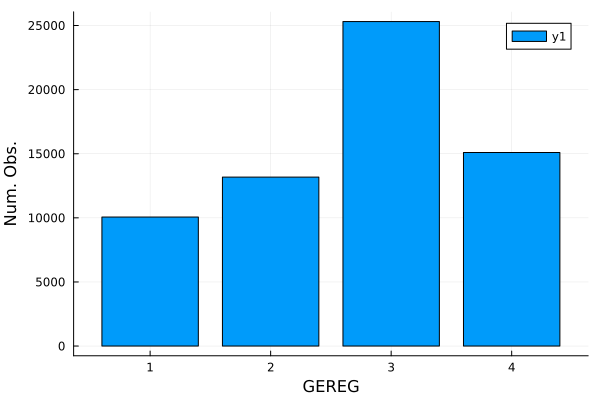

In [18]:
plt_gereg = @pipe cps |>
    groupby(_, :GEREG) |>
    combine(_, :TRATUSR => length => :num_obs) |>
    bar(_[:,:GEREG], _[:,:num_obs])

xlabel!(plt_gereg, "GEREG")
ylabel!(plt_gereg, "Num. Obs.")
xaxis!(plt_gereg, formatter = :plain)

The labels for `GEREG` are:
- 1 => "Northeast"
- 2 => "Midwest"
- 3 => "South"
- 4 => "West"

Regions are _very_ high level. We'd more likely prefer to use state definitions.

Shout out to [dantonnoriega](https://gist.github.com/dantonnoriega) for providing a CSV of the state FIPS codes.

BLS provides county and MSA codes as CSV. Both of these are available in the `./data` directory.

In [42]:
STATE_CODE_CSV = joinpath("data","us-state-ansi-fips.csv");

# Import and clean state code data.
state_codes = DataFrame(CSV.File(STATE_CODE_CSV));
rename!(state_codes, " st" => :GESTFIPS)
rename!(state_codes, " stusps" => :state_abbr)
transform!(state_codes, :state_abbr => (x -> lstrip.(x)) => :state_abbr)

describe(state_codes)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,stname,,Alabama,,Wyoming,0,String31
2,GESTFIPS,28.9608,1,29.0,56,0,Int64
3,state_abbr,,AK,,WY,0,String3


Now let's join this baby to our `cps` data!

In [23]:
cps = leftjoin(cps,state_codes, on = :GESTFIPS);
describe(cps[!,[:GESTFIPS]])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,Union
1,GESTFIPS,27.6538,1,27.0,56,0,"Union{Missing, Int64}"


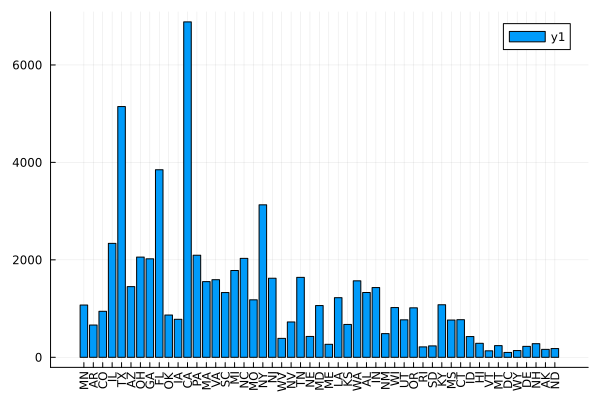

In [31]:
@pipe cps |>
    groupby(_, :state_abbr) |>
    combine(_, :TRATUSR => length => :num_obs) |>
    bar(_[:,:state_abbr], _[:, :num_obs], xticks = :all, xrotation = 90)

_What does this tell us?_

![Heatmaps](https://imgs.xkcd.com/comics/heatmap.png)

_Basically, nothing._

But this will be a useful input. Given a user's state, what are they doing at the moment.

The more specific CBSA (I've been mistakenly calling it MSA) _may_ be useful. But if there's like one person per MSA then it won't provide that much information. Let's see what the counts look like for that `GTCBSA` field.

In [88]:
CBSA_CODE_CSV_URL = "https://data.nber.org/cbsa-csa-fips-county-crosswalk/cbsa2fipsxw.csv";

# Import and clean CBSA data.
cbsa_codes = DataFrame(CSV.File(HTTP.get(CBSA_CODE_CSV_URL).body));
delete!(cbsa_codes,1)    # The first row is blank.
rename!(cbsa_codes, :cbsacode => :GTCBSA)


describe(cbsa_codes)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Union
1,GTCBSA,29813.9,10100,30400.0,49820,0,"Union{Missing, Int64}"
2,metrodivisioncode,33867.1,11244,35614.0,48864,1769,"Union{Missing, Int64}"
3,csacode,337.025,104,346.0,566,668,"Union{Missing, Int64}"
4,cbsatitle,,"Aberdeen, SD",,"Zapata, TX",0,"Union{Missing, String}"
5,metropolitanmicropolitanstatis,,Metropolitan Statistical Area,,Micropolitan Statistical Area,0,"Union{Missing, String31}"
6,metropolitandivisiontitle,,"Anaheim-Santa Ana-Irvine, CA",,"Wilmington, DE-MD-NJ",1769,"Union{Missing, String}"
7,csatitle,,"Albany-Schenectady, NY",,"Youngstown-Warren, OH-PA",668,"Union{Missing, String}"
8,countycountyequivalent,,Abbeville County,,Zapata County,0,"Union{Missing, String31}"
9,statename,,Alabama,,Wyoming,0,"Union{Missing, String31}"


In [97]:
# Convert `cps.GTCBSA = 0` to missing.
replace!(cps.GTCBSA, 0=>missing)


63645-element Vector{Union{Missing, Int64}}:
      missing
 38220
 38220
      missing
 40420
 40420
 40420
 41700
 38060
 38060
     ⋮
 16980
      missing
      missing
      missing
      missing
 16700
 16700
 16700
 16700

In [107]:
# Finally, join in the data.
cps = leftjoin(cps, cbsa_codes[:,[:GTCBSA, :csatitle]], on = :GTCBSA, matchmissing = :equal)

Row,TRATUSR,TULINENO,GEREG,GEDIV,GESTFIPS,GTCBSA,GTCO,GTMETSTA,HEFAMINC,HEHOUSUT,HETENURE,HRHTYPE,PECYC,PEEDUCA,PEDWWK,PEDW4WK,PRTAGE,PRWKSTAT,PUABSOT,stname,state_abbr,csatitle
,Int64?,Int64,Cat…?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String31?,String3?,String?
1,0,1,3,7,5,38220,0,1,7,5,1,1,missing,39,missing,missing,80,1,missing,Arkansas,AR,"Little Rock-North Little Rock, AR"
2,0,1,3,7,5,38220,0,1,7,5,1,1,missing,39,missing,missing,80,1,missing,Arkansas,AR,"Little Rock-North Little Rock, AR"
3,0,1,3,7,5,38220,0,1,7,5,1,1,missing,39,missing,missing,80,1,missing,Arkansas,AR,"Little Rock-North Little Rock, AR"
4,0,2,3,7,5,38220,0,1,7,5,1,1,3,41,missing,missing,75,1,missing,Arkansas,AR,"Little Rock-North Little Rock, AR"
5,0,2,3,7,5,38220,0,1,7,5,1,1,3,41,missing,missing,75,1,missing,Arkansas,AR,"Little Rock-North Little Rock, AR"
6,0,2,3,7,5,38220,0,1,7,5,1,1,3,41,missing,missing,75,1,missing,Arkansas,AR,"Little Rock-North Little Rock, AR"
7,1,1,2,3,17,40420,0,1,10,1,1,6,5,42,missing,missing,30,2,missing,Illinois,IL,"Rockford-Freeport-Rochelle, IL"
8,1,1,2,3,17,40420,0,1,10,1,1,6,5,42,missing,missing,30,2,missing,Illinois,IL,"Rockford-Freeport-Rochelle, IL"
9,0,2,2,3,17,40420,0,1,10,1,1,6,1,40,missing,missing,29,7,missing,Illinois,IL,"Rockford-Freeport-Rochelle, IL"


In [117]:
@pipe cps |>
    select(_, :csatitle) |>
    describe(_,:nmissing)

Row,variable,nmissing
,Symbol,Int64
1,csatitle,39566


There are 39,566 missing `csatitle` values.

In [118]:
39566/nrow(cps)

0.09575832675840905

That's 9.6% of the data. Not ideal but workable. Let's see the count list.

In [121]:
@pipe cps |>
    groupby(_, :csatitle) |>
    combine(_, :TRATUSR => length => :num_obs) |>
    sort(_,:num_obs)

Row,csatitle,num_obs
,String?,Int64
1,"Wausau-Stevens Point-Wisconsin Rapids, WI",19
2,"Johnstown-Somerset, PA",26
3,"Saginaw-Midland-Bay City, MI",32
4,"Bloomington-Bedford, IN",42
5,"Erie-Meadville, PA",50
6,"Midland-Odessa, TX",52
7,"Modesto-Merced, CA",53
8,"Greenville-Washington, NC",59
9,"Bend-Redmond-Prineville, OR",59


When you exclude `missing`, the lowest cardinality category is `Wausau-Stevens Point-Wisconsin Rapids, WI` with 19 observations.

That's not bad!!! I think there's enough information in this field to use it in a model.

Next, let's take a look at income categories -- `HEFAMINC`.

In [ ]:
# This one will be helpful to label. We'll create `HEFAMINC_lbl` as an ordered categorical field.
transform(cps, :HEFAMINC => )

In [127]:
HEFAMINC_replacement_dict = Dict(
    1 => "Less than 5,000",
    2 => "5,000 to 7,499",
    3 => "7,500 to 9,999",
    4 => "10,000 to 12,499",
    5 => "12,500 to 14,999",
    6 => "15,000 to 19,999",
    7 => "20,000 to 24,999",
    8 => "25,000 to 29,999",
    9 => "30,000 to 34,999",
    10 => "35,000 to 39,999",
    11 => "40,000 to 49,999",
    12 => "50,000 to 59,999",
    13 => "60,000 to 74,999",
    14 => "75,000 to 99,999",
    15 => "100,000 to 149,999",
    16 => "150,000 and over"
);

In [148]:
cps.HEFAMINC_lbl = map(code_int -> HEFAMINC_replacement_dict[code_int], cps.HEFAMINC);
unique(cps.HEFAMINC_lbl)

16-element Vector{String}:
 "20,000 to 24,999"
 "35,000 to 39,999"
 "15,000 to 19,999"
 "100,000 to 149,999"
 "12,500 to 14,999"
 "10,000 to 12,499"
 "30,000 to 34,999"
 "50,000 to 59,999"
 "25,000 to 29,999"
 "75,000 to 99,999"
 "150,000 and over"
 "60,000 to 74,999"
 "40,000 to 49,999"
 "7,500 to 9,999"
 "Less than 5,000"
 "5,000 to 7,499"

In [163]:
ordered_keys = sort([k for k in keys(HEFAMINC_replacement_dict)]);
HEFAMINC_levels = [HEFAMINC_replacement_dict[k] for k in ordered_keys];
cps.HEFAMINC_lbl = categorical(cps.HEFAMINC_lbl, levels=HEFAMINC_levels, ordered=true);
unique(cps.HEFAMINC_lbl)


16-element Vector{String}:
 "20,000 to 24,999"
 "35,000 to 39,999"
 "15,000 to 19,999"
 "100,000 to 149,999"
 "12,500 to 14,999"
 "10,000 to 12,499"
 "30,000 to 34,999"
 "50,000 to 59,999"
 "25,000 to 29,999"
 "75,000 to 99,999"
 "150,000 and over"
 "60,000 to 74,999"
 "40,000 to 49,999"
 "7,500 to 9,999"
 "Less than 5,000"
 "5,000 to 7,499"

In [171]:
smry_hefaminc = @pipe cps |>
    groupby(_, :HEFAMINC_lbl) |>
    combine(_, :TRATUSR => length => :num_obs)

Row,HEFAMINC_lbl,num_obs
,Cat…,Int64
1,"Less than 5,000",6305
2,"5,000 to 7,499",3249
3,"7,500 to 9,999",4587
4,"10,000 to 12,499",6218
5,"12,500 to 14,999",5470
6,"15,000 to 19,999",11216
7,"20,000 to 24,999",15948
8,"25,000 to 29,999",16739
9,"30,000 to 34,999",18349


This looks surprisingly over-sampled on the high income levels. Let's look at a plot.

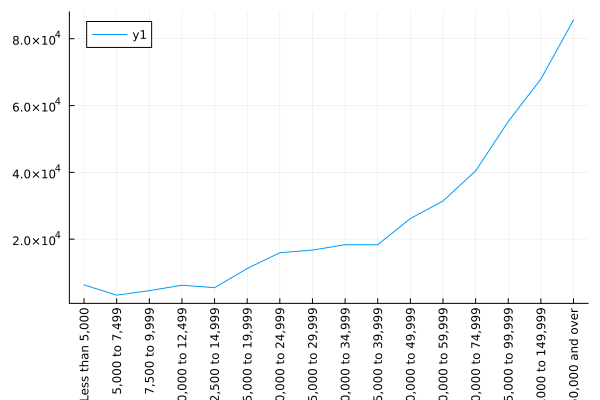

In [182]:
plt_hefaminc = plot(smry_hefaminc.HEFAMINC_lbl, smry_hefaminc.num_obs, xrotation = 90)


We would expect to see a more lognormal distribution -- very few small income levels but a peak somewhere in the middle.

To be fair, it's weird to have <\$10k in income. But I wouldn't expect the \$150k+ group to have more obzervations than the \$60k to \$75k group.

Regardless, there's plenty of information here. We can easily make use of this field as a predictor.